# Loading data into Pandas

This data is the web-scraping data from airbnb. San Francisco listing has been chosen for analysis. In order to be more
productive, some unrelevant columns are removed.

In [1]:
import pandas as pd
sf_listings = pd.read_csv("/Users/nicholastang/Desktop/sf_listings.csv", encoding = "iso-8859-1")
sf_listings.head(5)

,host_response_rate,host_acceptance_rate,city,state,zipcode,market,latitude,longitude,property_type,room_type,...,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
0,100%,NaN,San Francisco,CA,94121,San Francisco,37.787331,-122.492117,House,Private room,...,NaN,$120.00,NaN,NaN,$150.00,$35.00,1,$0.00,4,14
1,NaN,NaN,San Francisco,CA,94121,San Francisco,37.780708,-122.509160,Apartment,Entire home/apt,...,NaN,"$1,850.00",NaN,NaN,NaN,NaN,1,$0.00,1,1125
2,NaN,NaN,San Francisco,CA,94121,San Francisco,37.787664,-122.489152,House,Entire home/apt,...,NaN,$895.00,"$6,000.00",NaN,$250.00,$125.00,1,$0.00,3,14
3,NaN,NaN,San Francisco,CA,94121,San Francisco,37.787923,-122.484357,House,Entire home/apt,...,NaN,$975.00,NaN,NaN,$500.00,$150.00,4,$0.00,2,1125
4,90%,NaN,San Francisco,CA,94121,San Francisco,37.784365,-122.489515,Apartment,Entire home/apt,...,NaN,$295.00,NaN,NaN,$500.00,$150.00,3,$20.00,2,18


# Writing an apply function that transforms a column

The price column has originally been string. For analysis it is needed to be converted to the float type.

In [2]:
def transfer_column(str):
    price = str.replace('$','')
    price = price.replace(',','')
    price = float(price)
    return price
sf_listings['price'] = sf_listings['price'].apply(transfer_column)
sf_listings.head(5)

,host_response_rate,host_acceptance_rate,city,state,zipcode,market,latitude,longitude,property_type,room_type,...,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
0,100%,NaN,San Francisco,CA,94121,San Francisco,37.787331,-122.492117,House,Private room,...,NaN,120.0,NaN,NaN,$150.00,$35.00,1,$0.00,4,14
1,NaN,NaN,San Francisco,CA,94121,San Francisco,37.780708,-122.509160,Apartment,Entire home/apt,...,NaN,1850.0,NaN,NaN,NaN,NaN,1,$0.00,1,1125
2,NaN,NaN,San Francisco,CA,94121,San Francisco,37.787664,-122.489152,House,Entire home/apt,...,NaN,895.0,"$6,000.00",NaN,$250.00,$125.00,1,$0.00,3,14
3,NaN,NaN,San Francisco,CA,94121,San Francisco,37.787923,-122.484357,House,Entire home/apt,...,NaN,975.0,NaN,NaN,$500.00,$150.00,4,$0.00,2,1125
4,90%,NaN,San Francisco,CA,94121,San Francisco,37.784365,-122.489515,Apartment,Entire home/apt,...,NaN,295.0,NaN,NaN,$500.00,$150.00,3,$20.00,2,18


# A basic Data Visualization using Seaborn or Plotly library or Matplotlib

Let's make assumption that I own a house that has three beds inside and I want to rent the entire house on airbnb. What price should I set, not be too high or too low? First, some plots can be made for a direct look of the price related to beds and room type.

In [3]:
sf_listings = sf_listings.dropna(subset=['beds','price'])

(array([  5.14500000e+03,   3.05600000e+03,   4.34000000e+02,
          2.34000000e+02,   2.00000000e+01,   1.70000000e+01,
          6.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          4.00000000e+00]),
 array([  0. ,   1.6,   3.2,   4.8,   6.4,   8. ,   9.6,  11.2,  12.8,
         14.4,  16. ]),
 <a list of 10 Patch objects>)

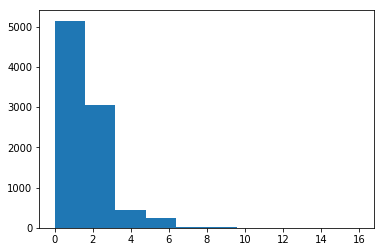

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(sf_listings['beds'])

(array([  8.71700000e+03,   1.40000000e+02,   3.40000000e+01,
          7.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+01]),
 array([     0.,   1000.,   2000.,   3000.,   4000.,   5000.,   6000.,
          7000.,   8000.,   9000.,  10000.]),
 <a list of 10 Patch objects>)

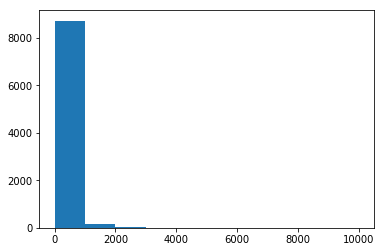

In [5]:
plt.hist(sf_listings['price'])

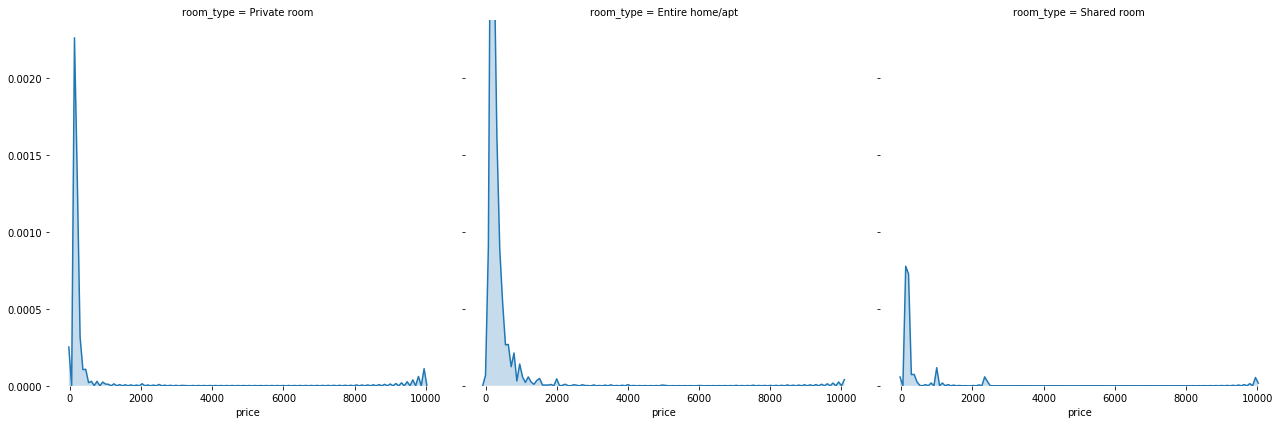

In [6]:
g = sns.FacetGrid(sf_listings, col = 'room_type', size =6)
g.map(sns.kdeplot, "price", shade = True)
sns.despine(top = True, bottom = True, left = True, right = True)

# Some type of Machine Learning technique on the data

In this case, K-nearest Neighbors is used for predicting the optimal price. And K is set to be 5.

In [7]:
## subset the data with the room type being entire home/apt
entire = sf_listings[sf_listings['room_type'] == 'Entire home/apt']
entire.head(5)

,host_response_rate,host_acceptance_rate,city,state,zipcode,market,latitude,longitude,property_type,room_type,...,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
1,NaN,NaN,San Francisco,CA,94121,San Francisco,37.780708,-122.509160,Apartment,Entire home/apt,...,NaN,1850.0,NaN,NaN,NaN,NaN,1,$0.00,1,1125
2,NaN,NaN,San Francisco,CA,94121,San Francisco,37.787664,-122.489152,House,Entire home/apt,...,NaN,895.0,"$6,000.00",NaN,$250.00,$125.00,1,$0.00,3,14
3,NaN,NaN,San Francisco,CA,94121,San Francisco,37.787923,-122.484357,House,Entire home/apt,...,NaN,975.0,NaN,NaN,$500.00,$150.00,4,$0.00,2,1125
4,90%,NaN,San Francisco,CA,94121,San Francisco,37.784365,-122.489515,Apartment,Entire home/apt,...,NaN,295.0,NaN,NaN,$500.00,$150.00,3,$20.00,2,18
5,100%,NaN,San Francisco,CA,94121,San Francisco,37.775236,-122.509137,House,Entire home/apt,...,NaN,159.0,$875.00,NaN,$200.00,$50.00,2,$10.00,2,7


In [10]:
import numpy as np
entire['distance'] = entire['beds'].apply(lambda x : np.abs(x - 3))
## randomnize the closest result since there are many 0 distance.
np.random.seed(1)
entire = entire.loc[np.random.permutation(len(entire))]

In [11]:
predicted_price = entire.head(5)['price'].mean()
predicted_price

411.25

Conclusion: if we are going to rent a entire home/apt with 3 beds, it's optimal to set $411.25 for one night.